In [7]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Authenticate with playlist-read-private scope
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id="Your_Client_Id",
    client_secret="Your_Client_Secret",
    redirect_uri="http://127.0.0.1:8000/callback",
    scope="user-top-read"
))

In [9]:
results = sp.current_user_top_tracks(limit=50, time_range='medium_term')
tracks = results['items']

explicit_flags = []
genres = []
popularities = []
track_names = []

for track in tracks:
    explicit = track.get('explicit', False)
    explicit_flags.append(explicit)
    
    # Safely check for artist info
    if 'artists' in track and track['artists']:
        artist_id = track['artists'][0]['id']
        try:
            artist = sp.artist(artist_id)
            artist_genres = artist.get('genres', [])
            genres.append(", ".join(artist_genres) if artist_genres else 'Unknown')
        except Exception as e:
            print(f"Error fetching artist {artist_id}: {e}")
            genres.append('Unknown')
    else:
        genres.append('Unknown')
    
    popularities.append(track.get('popularity', 0))
    track_names.append(track.get('name', 'Unknown'))

df = pd.DataFrame({
    'Track': track_names,
    'Explicit': explicit_flags,
    'Genres': genres,
    'Popularity': popularities
})
df.head()


,Track,Explicit,Genres,Popularity
0,Reflections,False,Unknown,84
1,Baila Conmigo (with Rauw Alejandro),False,Unknown,68
2,HIGHEST IN THE ROOM,True,rap,85
3,Why'd You Only Call Me When You're High?,False,"indie, garage rock",87
4,Kamikaze,True,"desi hip hop, hindi indie, hindi hip hop, indi...",63


In [10]:
explicit_percent = (df['Explicit'].sum() / len(df)) * 100
print(f"{explicit_percent:.1f}% of your top tracks are explicit.")


46.0% of your top tracks are explicit.


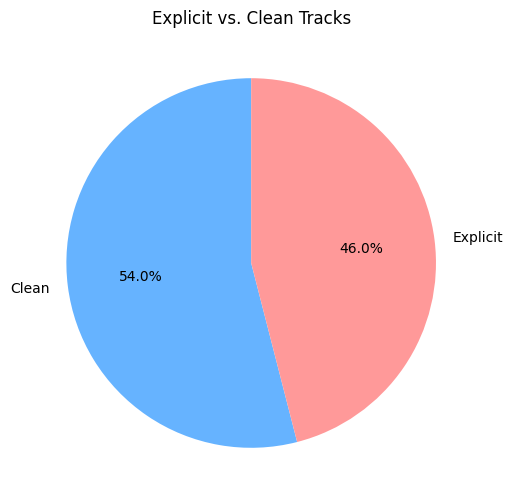

In [11]:
plt.figure(figsize=(6,6))
df['Explicit'].value_counts().plot.pie(
    labels=['Clean', 'Explicit'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90
)
plt.title('Explicit vs. Clean Tracks')
plt.ylabel('')
plt.show()


In [12]:
explicit_tracks = df[df['Explicit']][['Track', 'Genres', 'Popularity']]
print("Explicit tracks in your top songs:")
display(explicit_tracks)


Explicit tracks in your top songs:


,Track,Genres,Popularity
2,HIGHEST IN THE ROOM,rap,85
4,Kamikaze,"desi hip hop, hindi indie, hindi hip hop, indi...",63
5,Money Trees,"hip hop, west coast hip hop",84
7,Mask Off,rap,85
8,All The Stars (with SZA),"hip hop, west coast hip hop",94
9,Swim,Unknown,89
10,The Less I Know The Better,"neo-psychedelic, indie",88
11,Gata Only,reggaeton chileno,83
14,So High,Unknown,80
16,sdp interlude,rap,81


In [13]:
# Group by genre and calculate explicit percentage
genre_explicit = df.groupby('Genres').agg(
    total_tracks=('Track', 'count'),
    explicit_tracks=('Explicit', 'sum')
).reset_index()
genre_explicit['explicit_percent'] = (genre_explicit['explicit_tracks'] / genre_explicit['total_tracks']) * 100

# Display genres with highest explicit content
genre_explicit = genre_explicit.sort_values('explicit_percent', ascending=False)
print("Genres with the highest proportion of explicit tracks:")
display(genre_explicit.head(10))


Genres with the highest proportion of explicit tracks:


,Genres,total_tracks,explicit_tracks,explicit_percent
3,"desi hip hop, hindi indie, hindi hip hop, indi...",1,1,100.000000
4,"gangster rap, west coast hip hop, old school h...",1,1,100.000000
7,"hyperpop, nightcore, jersey club",1,1,100.000000
9,melodic rap,1,1,100.000000
10,"neo-psychedelic, indie",1,1,100.000000
11,r&b,1,1,100.000000
13,reggaeton chileno,1,1,100.000000
12,rap,6,5,83.333333
6,"hip hop, west coast hip hop",4,3,75.000000
0,Unknown,24,8,33.333333
